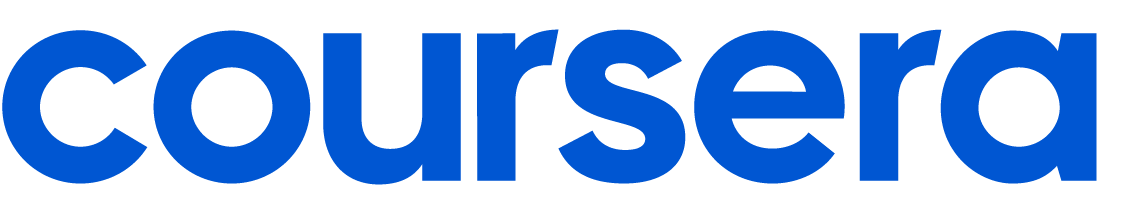

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant machine learning problems with a unique dataset that will put your modeling skills to the test. Financial loan services are leveraged by companies across many industries, from big banks to financial institutions to government loans. One of the primary objectives of companies with financial loan services is to decrease payment defaults and ensure that individuals are paying back their loans as expected. In order to do this efficiently and systematically, many companies employ machine learning to predict which individuals are at the highest risk of defaulting on their loans, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the loan default prediction problem on a very unique and interesting group of individuals who have taken financial loans. 

Imagine that you are a new data scientist at a major financial institution and you are tasked with building a model that can predict which individuals will default on their loan payments. We have provided a dataset that is a sample of individuals who received loans in 2021. 

This financial institution has a vested interest in understanding the likelihood of each individual to default on their loan payments so that resources can be allocated appropriately to support these borrowers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past borrowers of a financial institution that contain information about the individual and the specific loan. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (255,347 borrowers to be exact) and importantly, will reveal whether or not the borrower has defaulted on their loan payments (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (109,435 borrowers to be exact), but does not disclose the “ground truth” for each borrower. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the borrowers in `test.csv` will default on their loan payments, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique Loan. For each Loan, a single observation (`LoanID`) is included during which the loan was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Default` which indicates if a borrower has defaulted on payments.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [1]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,LoanID,Identifier,string,A unique identifier for each loan.
1,Age,Feature,integer,The age of the borrower.
2,Income,Feature,integer,The annual income of the borrower.
3,LoanAmount,Feature,integer,The amount of money being borrowed.
4,CreditScore,Feature,integer,"The credit score of the borrower, indicating their creditworthiness."
5,MonthsEmployed,Feature,integer,The number of months the borrower has been employed.
6,NumCreditLines,Feature,integer,The number of credit lines the borrower has open.
7,InterestRate,Feature,float,The interest rate for the loan.
8,LoanTerm,Feature,integer,The term length of the loan in months.
9,DTIRatio,Feature,float,"The Debt-to-Income ratio, indicating the borrower's debt compared to their income."


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 109,435 rows (plus a header row). The first column should be `LoanID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likelihood that the borrower will default__.

Your submission will show an error if you have extra columns (beyond `LoanID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which loans will default, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [2]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Import any other packages you may want to use
pd.set_option("display.max_columns",None)

# Classifier Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

# Encoder
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Scaler 
from sklearn.preprocessing import StandardScaler

# Pipeline 
from sklearn.pipeline import make_pipeline

# Transformer
from sklearn.compose import ColumnTransformer

# Deep Learning
from tensorflow import keras
from tensorflow.keras import layers

# Shuffle
from sklearn.utils import shuffle

# Metric
from sklearn.metrics import confusion_matrix, classification_report, roc_curve


## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [4]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head(1)

train_df Shape: (255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0


In [5]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head(1)

test_df Shape: (109435, 17)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.1,24,0.13,High School,Full-time,Divorced,Yes,No,Other,No


## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

In [6]:
# your code here (optional)

In [7]:
train = train_df.copy()

In [8]:
train.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [10]:
train.isna().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [11]:
train.duplicated().sum()

0

### Descriptive Statistic

In [12]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,255347.0,43.498306,14.990258,18.0,31.00,43.00,56.00,69.0
Income,255347.0,82499.304597,38963.013729,15000.0,48825.50,82466.00,116219.00,149999.0
LoanAmount,255347.0,127578.865512,70840.706142,5000.0,66156.00,127556.00,188985.00,249999.0
CreditScore,255347.0,574.264346,158.903867,300.0,437.00,574.00,712.00,849.0
MonthsEmployed,255347.0,59.541976,34.643376,0.0,30.00,60.00,90.00,119.0
NumCreditLines,255347.0,2.501036,1.117018,1.0,2.00,2.00,3.00,4.0
InterestRate,255347.0,13.492773,6.636443,2.0,7.77,13.46,19.25,25.0
LoanTerm,255347.0,36.025894,16.969330,12.0,24.00,36.00,48.00,60.0
DTIRatio,255347.0,0.500212,0.230917,0.1,0.30,0.50,0.70,0.9
Default,255347.0,0.116128,0.320379,0.0,0.00,0.00,0.00,1.0


In [13]:
train.describe(include='O').T

,count,unique,top,freq
LoanID,255347,255347,M475NNV4CV,1
Education,255347,4,Bachelor's,64366
EmploymentType,255347,4,Part-time,64161
MaritalStatus,255347,3,Married,85302
HasMortgage,255347,2,Yes,127677
HasDependents,255347,2,Yes,127742
LoanPurpose,255347,5,Business,51298
HasCoSigner,255347,2,Yes,127701


In [14]:
def visualize(df,col):
    fig, axes = plt.subplots(1,2,figsize=(10,5))
    axes[0].hist(df[col])
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')
    
    axes[1].boxplot(df[col],vert=False)
    axes[1].set_xlabel(col)
    axes[1].set_ylabel(None)
    
    plt.suptitle(f"Distribution of {col}",y=1.05, fontsize=14 )
    plt.tight_layout()
    plt.show()

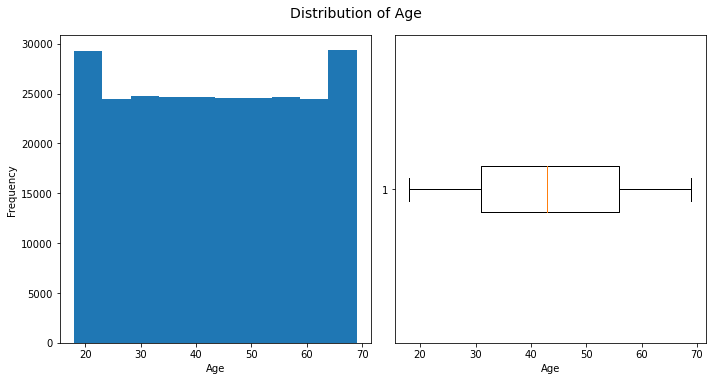

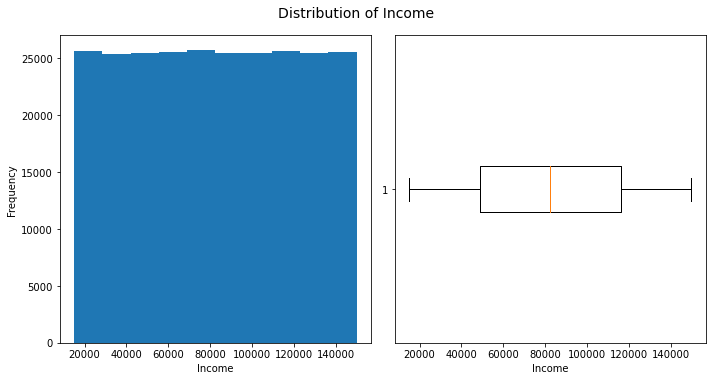

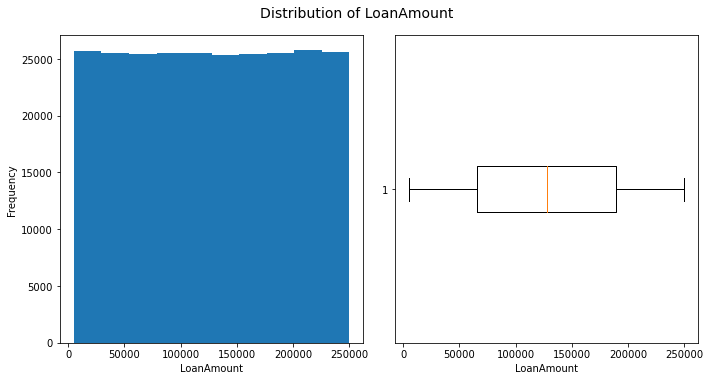

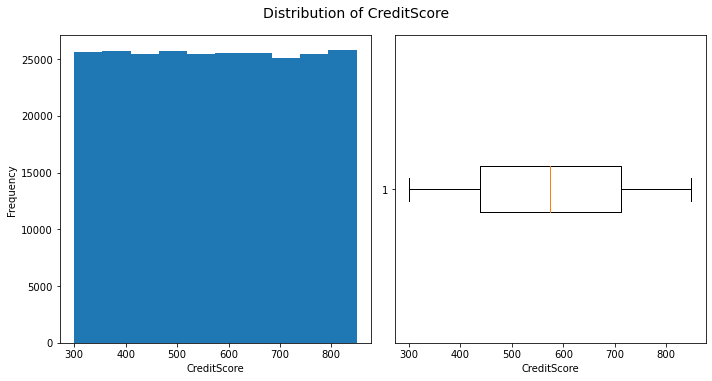

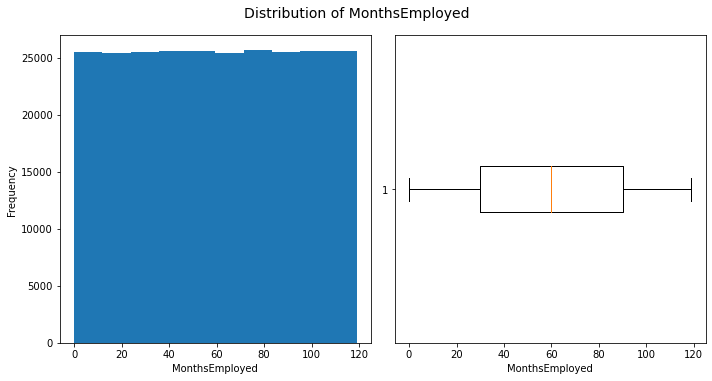

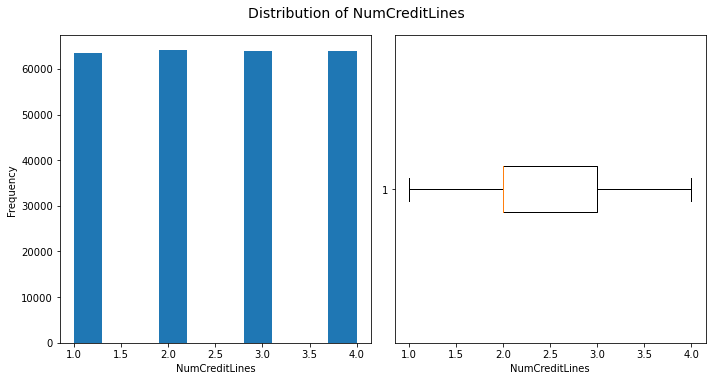

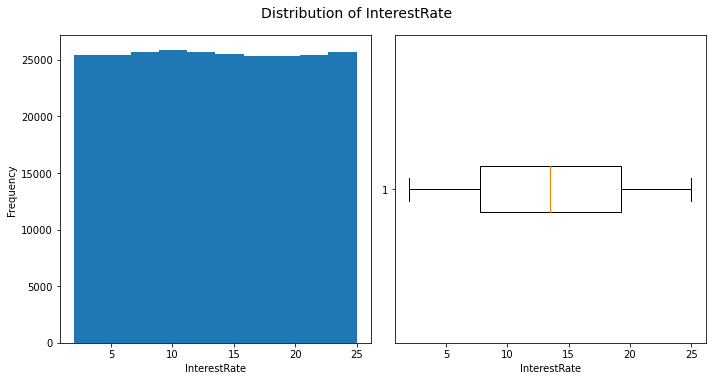

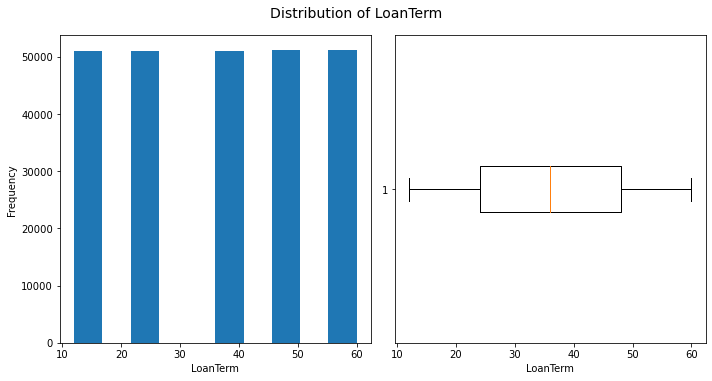

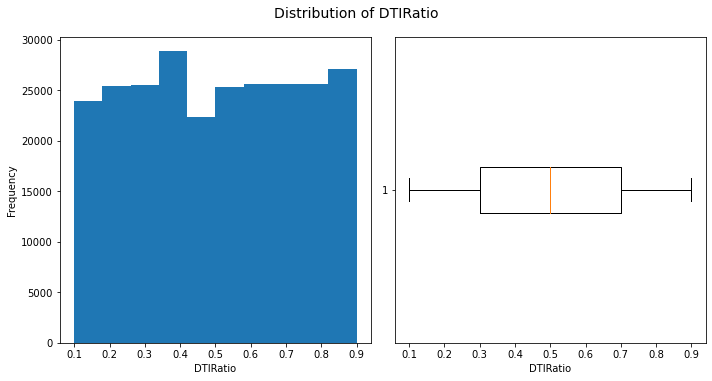

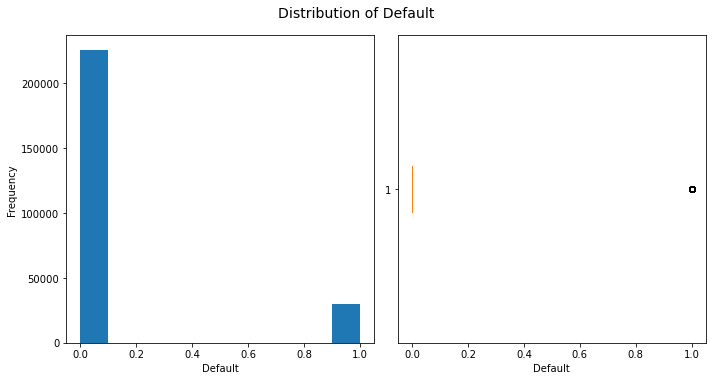

In [15]:
for i in train.select_dtypes('number').columns:
    visualize(train,i)

In [16]:
for x in train.select_dtypes('object').columns:
    col = train[x].value_counts().to_frame()
    col['Percentage (%)'] = (col[x] / len(train) * 100).round(2)
    
    print(f"Column : {x}")
    display(col)
    print("--"*20)
    print()
    

Column : LoanID


,LoanID,Percentage (%)
M475NNV4CV,1,0.0
DVO3QAUVKM,1,0.0
A9PIN1B9IQ,1,0.0
XQCTWA2VEG,1,0.0
FUFNXCNH4T,1,0.0
...,...,...
SQ02Z4JEJU,1,0.0
STTY0KVHWD,1,0.0
6A1RXCFQMH,1,0.0
62O7UGC2WT,1,0.0


----------------------------------------

Column : Education


,Education,Percentage (%)
Bachelor's,64366,25.21
High School,63903,25.03
Master's,63541,24.88
PhD,63537,24.88


----------------------------------------

Column : EmploymentType


,EmploymentType,Percentage (%)
Part-time,64161,25.13
Unemployed,63824,25.00
Self-employed,63706,24.95
Full-time,63656,24.93


----------------------------------------

Column : MaritalStatus


,MaritalStatus,Percentage (%)
Married,85302,33.41
Divorced,85033,33.30
Single,85012,33.29


----------------------------------------

Column : HasMortgage


,HasMortgage,Percentage (%)
Yes,127677,50.0
No,127670,50.0


----------------------------------------

Column : HasDependents


,HasDependents,Percentage (%)
Yes,127742,50.03
No,127605,49.97


----------------------------------------

Column : LoanPurpose


,LoanPurpose,Percentage (%)
Business,51298,20.09
Home,51286,20.08
Education,51005,19.97
Other,50914,19.94
Auto,50844,19.91


----------------------------------------

Column : HasCoSigner


,HasCoSigner,Percentage (%)
Yes,127701,50.01
No,127646,49.99


----------------------------------------



## EDA

In [17]:
train.select_dtypes(include='object').columns

Index(['LoanID', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')

,Freq.
Bachelor's,64366
High School,63903
Master's,63541
PhD,63537


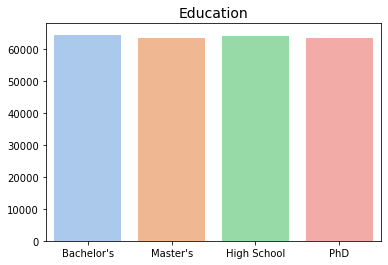

In [18]:
display(train['Education'].value_counts().to_frame(name='Freq.'))
ax = sns.countplot(data=train, x='Education', palette='pastel')
plt.ylim(0,68000)
plt.xlabel(None)
plt.ylabel(None)
plt.title("Education", fontsize=14)
plt.show()

,Freq.
Part-time,64161
Unemployed,63824
Self-employed,63706
Full-time,63656


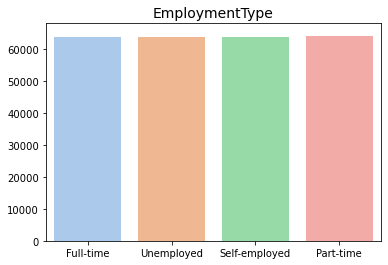

In [19]:
display(train['EmploymentType'].value_counts().to_frame(name='Freq.'))
ax = sns.countplot(data=train, x='EmploymentType', palette='pastel')
plt.ylim(0,68000)
plt.xlabel(None)
plt.ylabel(None)
plt.title("EmploymentType", fontsize=14)
plt.show()

,Freq.
Married,85302
Divorced,85033
Single,85012


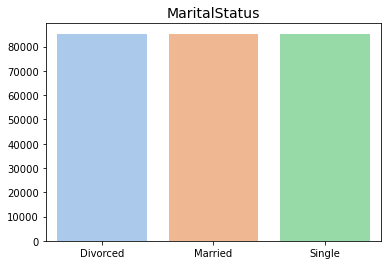

In [20]:
display(train['MaritalStatus'].value_counts().to_frame(name='Freq.'))
ax = sns.countplot(data=train, x='MaritalStatus', palette='pastel')
plt.xlabel(None)
plt.ylabel(None)
plt.title("MaritalStatus", fontsize=14)
plt.show()

,Freq.
Yes,127677
No,127670


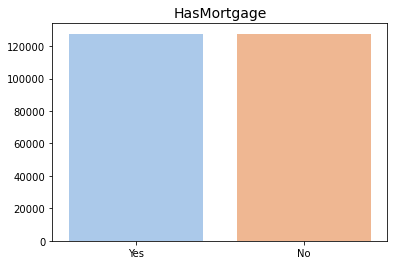

In [21]:
display(train['HasMortgage'].value_counts().to_frame(name='Freq.'))
ax = sns.countplot(data=train, x='HasMortgage', palette='pastel')
plt.xlabel(None)
plt.ylabel(None)
plt.title("HasMortgage", fontsize=14)
plt.show()

,Freq.
Yes,127742
No,127605


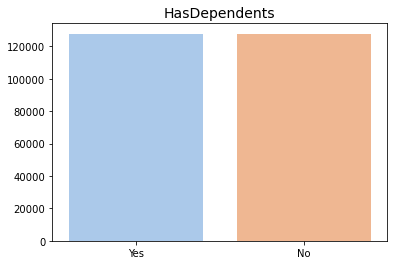

In [22]:
display(train['HasDependents'].value_counts().to_frame(name='Freq.'))
ax = sns.countplot(data=train, x='HasDependents', palette='pastel')
plt.xlabel(None)
plt.ylabel(None)
plt.title("HasDependents", fontsize=14)
plt.show()

,Freq.
Yes,127701
No,127646


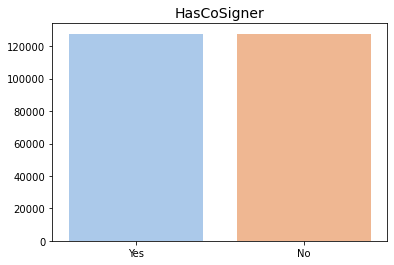

In [23]:
display(train['HasCoSigner'].value_counts().to_frame(name='Freq.'))
ax = sns.countplot(data=train, x='HasCoSigner', palette='pastel')
plt.xlabel(None)
plt.ylabel(None)
plt.title("HasCoSigner", fontsize=14)
plt.show()

,Freq.
Business,51298
Home,51286
Education,51005
Other,50914
Auto,50844


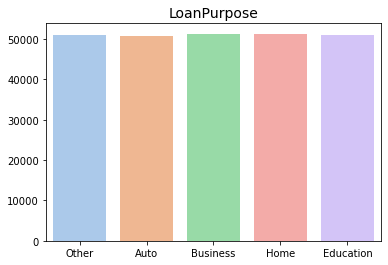

In [24]:
display(train['LoanPurpose'].value_counts().to_frame(name='Freq.'))
ax = sns.countplot(data=train, x='LoanPurpose', palette='pastel')
plt.xlabel(None)
plt.ylabel(None)
plt.title("LoanPurpose", fontsize=14)
plt.show()

,Freq.
0,0.883872
1,0.116128


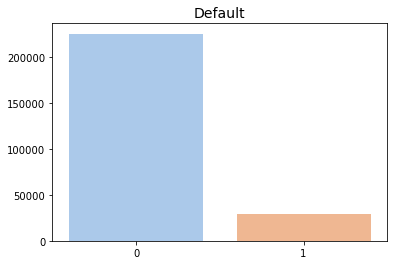

In [38]:
display(train['Default'].value_counts(normalize=True).to_frame(name='Freq.'))
ax = sns.countplot(data=train, x='Default', palette='pastel')
plt.xlabel(None)
plt.ylabel(None)
plt.title("Default", fontsize=14)
plt.show()

In [26]:
# Age Segment
train['Segment'] = pd.cut(train['Age'], bins=[18,30,40,55,70], 
                   labels=['Young Adult','Early Middle Age','Late Middle Age','Senior'],right=False)

,Freq.
Senior,73619
Late Middle Age,73614
Young Adult,58623
Early Middle Age,49491


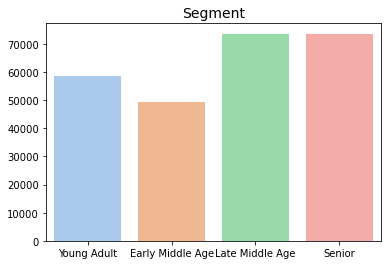

In [27]:
display(train['Segment'].value_counts().to_frame(name='Freq.'))
ax = sns.countplot(data=train, x='Segment', palette='pastel')
plt.xlabel(None)
plt.ylabel(None)
plt.title("Segment", fontsize=14)
plt.show()

### Split Data

In [28]:
X = train.copy()
X = X.drop(['LoanID', 'Default'], axis=1)
y = train['Default']

X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                  test_size=0.2, stratify=y, 
                                                  random_state=42)

In [29]:
print(f"Target Distribution (y_train):\n{y_train.value_counts()}\n")
print(f"Target Distribution (y_val):\n{y_val.value_counts()}")

Target Distribution (y_train):
0    180555
1     23722
Name: Default, dtype: int64

Target Distribution (y_val):
0    45139
1     5931
Name: Default, dtype: int64


### Data Transformation

In [30]:
train.select_dtypes('number').columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Default'],
      dtype='object')

In [31]:
train.select_dtypes('O').columns

Index(['LoanID', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner'],
      dtype='object')

In [32]:
train.Segment.unique()

[Senior, Late Middle Age, Early Middle Age, Young Adult]
Categories (4, object): [Young Adult < Early Middle Age < Late Middle Age < Senior]

In [33]:
# Identification Column
num_features = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

cat_features = ['MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose','HasCoSigner']

ordinal_cat_features = ['Education', 'EmploymentType','Segment']

ordinal_categories = [
    ["High School","Bachelor's", "Master's","PhD"],
    ['Unemployed','Part-time','Full-time','Self-employed'],
    ['Young Adult','Early Middle Age','Late Middle Age','Senior']
]

In [34]:
# Pipeline
numeric_pipeline = make_pipeline(
    StandardScaler())

categorical_pipeline = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'))

ordinal_cat_pipeline = make_pipeline(
    OrdinalEncoder(categories=ordinal_categories))

In [35]:
# Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, num_features),
        ('cat', categorical_pipeline, cat_features),
        ('ord_cat', ordinal_cat_pipeline, ordinal_cat_features)
    ])

### Sampling

In [39]:
train_undersampling = train.copy()

In [40]:
class_1 = train_undersampling[train_undersampling['Default'] == 1]
class_0 = train_undersampling[train_undersampling['Default'] == 0]

target_ratio = 0.2

n_class_1 = len(class_1)

n_class_0_target = int((n_class_1 * (1 - target_ratio)) / target_ratio)

class_0_sampled = class_0.sample(n=n_class_0_target, random_state=42)

train_balanced = pd.concat([class_1, class_0_sampled])

print(train_balanced['Default'].value_counts(normalize=True) * 100)

0    80.0
1    20.0
Name: Default, dtype: float64


In [41]:
X_balanced = train_balanced.drop(['LoanID', 'Default'], axis=1)
y_balanced = train_balanced['Default']

In [42]:
# Balanced Split
X_train_b, X_val_b, y_train_b, y_val_b = train_test_split(X_balanced, y_balanced, 
                                                  test_size=0.2,stratify=y_balanced,
                                                  random_state=42)

In [43]:
len(class_0)
print(f"Train (Undersampled) : \n{train_balanced['Default'].value_counts()}")
print(f"Train (Not Undersampled) : \n{train['Default'].value_counts()}")

Train (Undersampled) : 
0    118612
1     29653
Name: Default, dtype: int64
Train (Not Undersampled) : 
0    225694
1     29653
Name: Default, dtype: int64


### Model with Pipeline

In [44]:
forest_clf = make_pipeline(preprocessor, RandomForestClassifier())
#logistic_clf = make_pipeline(preprocessor, LogisticRegression())
#sgd_clf = make_pipeline(preprocessor, SGDClassifier())
#xgb_clf = make_pipeline(preprocessor, xgb.XGBClassifier())

In [45]:
#help(xgb.XGBClassifier())

In [46]:
# Confusion Matrix Plot
def plot_metrics(y_true, y_pred, estimator):
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('Actual', fontsize=14)
    plt.title(f"Confussion Matrix ({estimator})", fontsize=15)
    plt.show()
    
    # ROC Score
    roc_auc = roc_auc_score(y_true, y_pred)
    print(f"ROC AUC Score: {roc_auc:.4f}")
    
    # Classification Report
    cls_report = classification_report(y_true, y_pred)
    print(f'Estimator : {estimator}\n')
    print(cls_report)
    
    

In [47]:
# Random Forest
forest_clf.fit(X_balanced, y_balanced)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('standardscaler',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['Age', 'Income',
                                                   'LoanAmount', 'CreditScore',
                            

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [247]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Pipeline kamu
pipe = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])
# GridSearch param
param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [10, 20, None],
    'model__class_weight': ['balanced']
}

# GridSearchCV
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='f1', verbose=2)
grid.fit(X_balanced, y_balanced)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] model__class_weight=balanced, model__max_depth=10, model__n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__class_weight=balanced, model__max_depth=10, model__n_estimators=100, total=  16.2s
[CV] model__class_weight=balanced, model__max_depth=10, model__n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.2s remaining:    0.0s


[CV]  model__class_weight=balanced, model__max_depth=10, model__n_estimators=100, total=  15.8s
[CV] model__class_weight=balanced, model__max_depth=10, model__n_estimators=100 
[CV]  model__class_weight=balanced, model__max_depth=10, model__n_estimators=100, total=  15.8s
[CV] model__class_weight=balanced, model__max_depth=10, model__n_estimators=100 
[CV]  model__class_weight=balanced, model__max_depth=10, model__n_estimators=100, total=  15.7s
[CV] model__class_weight=balanced, model__max_depth=10, model__n_estimators=100 
[CV]  model__class_weight=balanced, model__max_depth=10, model__n_estimators=100, total=  15.4s
[CV] model__class_weight=balanced, model__max_depth=10, model__n_estimators=200 
[CV]  model__class_weight=balanced, model__max_depth=10, model__n_estimators=200, total=  30.4s
[CV] model__class_weight=balanced, model__max_depth=10, model__n_estimators=200 
[CV]  model__class_weight=balanced, model__max_depth=10, model__n_estimators=200, total=  30.6s
[CV] model__class_w

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 14.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('standardscaler',
                                                                                          StandardScaler(copy=True,
                                                                                                         with_mean=True,
                                

In [251]:
grid.best_params_

{'model__class_weight': 'balanced',
 'model__max_depth': 10,
 'model__n_estimators': 200}

In [253]:
grid.best_score_

0.46523893557724866

In [48]:
y_pred_forest = forest_clf.predict(X_val)

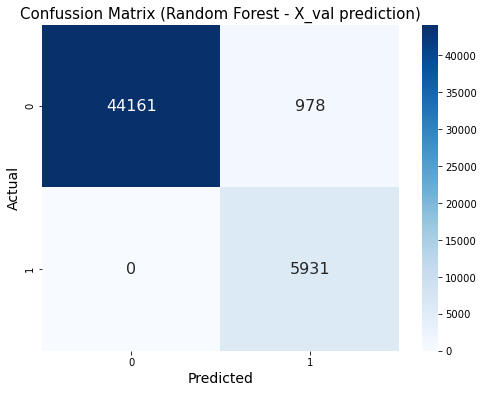

ROC AUC Score: 0.9892
Estimator : Random Forest - X_val prediction

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     45139
           1       0.86      1.00      0.92      5931

    accuracy                           0.98     51070
   macro avg       0.93      0.99      0.96     51070
weighted avg       0.98      0.98      0.98     51070



In [51]:
# Random Forest Result
plot_metrics(y_val, y_pred_forest, "Random Forest - X_val prediction")

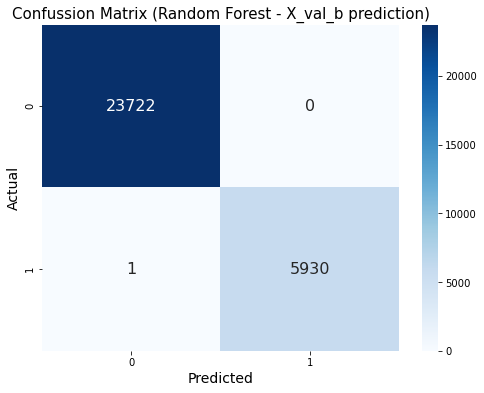

ROC AUC Score: 0.9999
Estimator : Random Forest - X_val_b prediction

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23722
           1       1.00      1.00      1.00      5931

    accuracy                           1.00     29653
   macro avg       1.00      1.00      1.00     29653
weighted avg       1.00      1.00      1.00     29653



In [54]:
plot_metrics(y_val_b, forest_clf.predict(X_val_b), "Random Forest - X_val_b prediction")

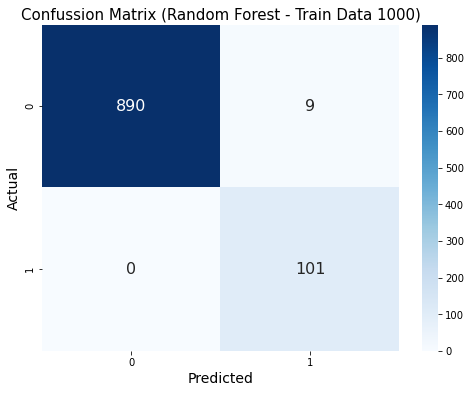

ROC AUC Score: 0.9950
Estimator : Random Forest - Train Data 1000

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       899
           1       0.92      1.00      0.96       101

    accuracy                           0.99      1000
   macro avg       0.96      0.99      0.98      1000
weighted avg       0.99      0.99      0.99      1000



In [55]:
plot_metrics(y[-1000:], forest_clf.predict(X[-1000:]), "Random Forest - Train Data 1000")

In [56]:
train_class1 = train.copy()
train_class1 = train_class1[train_class1.Default == 1]

train_class0 = train.copy()
train_class0 = train_class0[train_class0.Default == 0]

In [57]:
pred_class1 = forest_clf.predict(train_class1.drop(['LoanID', 'Default'], axis=1))
y_c1 = train_class1.Default

pred_class0 = forest_clf.predict(train_class0.drop(['LoanID', 'Default'], axis=1))
y_c0 = train_class0.Default

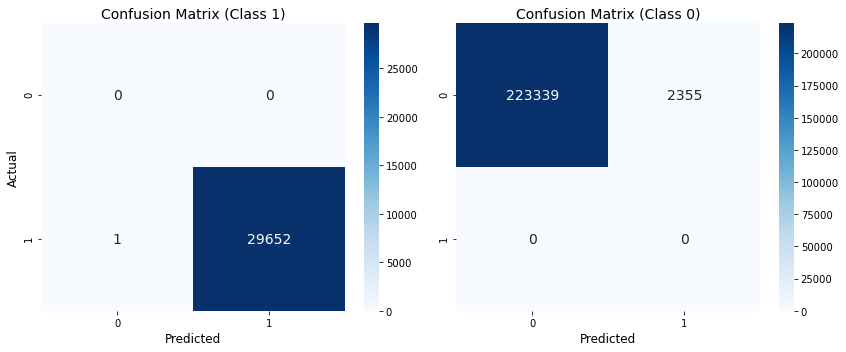

In [58]:
# Buat confusion matrix
cm_1 = confusion_matrix(y_c1, pred_class1)
cm_0 = confusion_matrix(y_c0, pred_class0)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot CM untuk Class 1
sns.heatmap(cm_1, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14}, ax=ax[0])
ax[0].set_xlabel('Predicted', fontsize=12)
ax[0].set_ylabel('Actual', fontsize=12)
ax[0].set_title('Confusion Matrix (Class 1)', fontsize=14)

# Plot CM untuk Class 0
sns.heatmap(cm_0, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 14}, ax=ax[1])
ax[1].set_xlabel('Predicted', fontsize=12)
ax[1].set_ylabel(None, fontsize=12)
ax[1].set_title('Confusion Matrix (Class 0)', fontsize=14)

plt.tight_layout()

plt.show()

In [61]:
# Test
test_df["Segment"] = pd.cut(train['Age'], bins=[18,30,40,55,70], 
                        labels=['Young Adult','Early Middle Age','Late Middle Age','Senior'],
                        right=False)

test_df.head(5)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Segment
0,7RYZGMKJIR,32,131645,43797,802,23,2,6.10,24,0.13,High School,Full-time,Divorced,Yes,No,Other,No,Senior
1,JDL5RH07AM,61,134312,18402,369,87,2,12.99,60,0.59,High School,Self-employed,Single,No,No,Business,Yes,Senior
2,STAL716Y79,55,115809,151774,563,3,3,5.51,48,0.82,Bachelor's,Full-time,Single,Yes,Yes,Other,Yes,Late Middle Age
3,SO0KKJ3IQB,58,94970,55789,337,24,1,23.93,36,0.77,Bachelor's,Unemployed,Divorced,No,No,Business,No,Early Middle Age
4,T99CWTYDCP,63,71727,189798,451,52,3,22.05,48,0.44,PhD,Unemployed,Single,Yes,No,Auto,No,Senior


In [124]:
# Predict Probability

test_transformed = test_df.drop(columns='LoanID')

In [127]:
predicted_test = forest_clf.predict_proba(test_transformed)[:, 1]

In [128]:
predicted_test

array([0.19, 0.05, 0.04, ..., 0.06, 0.09, 0.71])

In [135]:
prediction_df = pd.DataFrame({
    'LoanID': test_df['LoanID'],
    'predicted_probability': predicted_test
})
prediction_df.to_csv('submission.csv', index=False)


In [130]:
pd.read_csv('submission.csv')

,LoanID,predicted_probability
0,7RYZGMKJIR,0.19
1,JDL5RH07AM,0.05
2,STAL716Y79,0.04
3,SO0KKJ3IQB,0.36
4,T99CWTYDCP,0.17
...,...,...
109430,V12FM6UKMS,0.15
109431,GLRB9P0CQO,0.11
109432,RWCJ3SL2J6,0.06
109433,2Z9IZS4OMY,0.09


## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 109,435 entries plus a header row attempting to predict the likelihood of borrowers to default on their loans in `test_df`. Your submission will throw an error if you have extra columns (beyond `LoanID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`LoanID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts loan defaults using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

In [131]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Fit a dummy classifier on the feature columns in train_df:
#dummy_clf = DummyClassifier(strategy="stratified")
#dummy_clf.fit(train_df.drop(['LoanID', 'Default'], axis=1), train_df.Default)

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [141]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Use our dummy classifier to make predictions on test_df using `predict_proba` method:
predicted_probability = forest_clf.predict_proba(test_df)[:,1]
predicted_probability


array([0.19, 0.05, 0.04, ..., 0.06, 0.09, 0.71])

In [142]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'LoanID': test_df[['LoanID']].values[:, 0],
                             'predicted_probability': predicted_probability})

In [143]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df.shape)
prediction_df.head(10)

(109435, 2)


,LoanID,predicted_probability
0,7RYZGMKJIR,0.19
1,JDL5RH07AM,0.05
2,STAL716Y79,0.04
3,SO0KKJ3IQB,0.36
4,T99CWTYDCP,0.17
5,0SNHFWV4UP,0.29
6,S6ITP6LGYS,0.05
7,A6I7U12IRJ,0.21
8,8W6KY50JU4,0.24
9,THFQ08OLMU,0.19


**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [144]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [145]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'LoanID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [146]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 109435, 'The dataframe prediction_df should have 109435 rows.'

In [147]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [148]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!